In [1]:
"""!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect"""

'!pip install textblob\n!pip install tweepy\n!pip install pycountry\n!pip install wordcloud\n!pip install langdetect'

In [2]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\0703L\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\0703L\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
apikey = "pCvgFAg6FQjs3QFyBKqtikLfT"
apikeysecret = "aaqqnbDM6TuBgsHVsDgzbIAGAKB0V23zd1crWGsJ7y4OnVKpWy"
bearertoken = "AAAAAAAAAAAAAAAAAAAAAOxRlwEAAAAACRqMeXm24mPG2ua%2BMI76FSyQ6%2Fw%3Dt31qVD2DSPis2CCI3H9eM8xQxP2shseYwpoUaPcq5YucJbWxdR"

consumerKey = "pCvgFAg6FQjs3QFyBKqtikLfT"
consumerSecret = "aaqqnbDM6TuBgsHVsDgzbIAGAKB0V23zd1crWGsJ7y4OnVKpWy"
accessToken = "765609343014219776-fIRDSXprc343kSdbqjOgcyCWJGOpl9x"
accessTokenSecret = "KEDjwpoFJHekTAqRQJnpNVTrhpOyAFDXFh0UKKnr3Kjqy"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [4]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:

     #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1

    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1
        
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, ".1f")
negative = format(negative, ".1f")
neutral = format(neutral, ".1f")

Please enter keyword or hashtag to search: bitcoin
Please enter how many tweets to analyze: 200


In [5]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  200
positive number:  74
negative number:  27
neutral number:  99


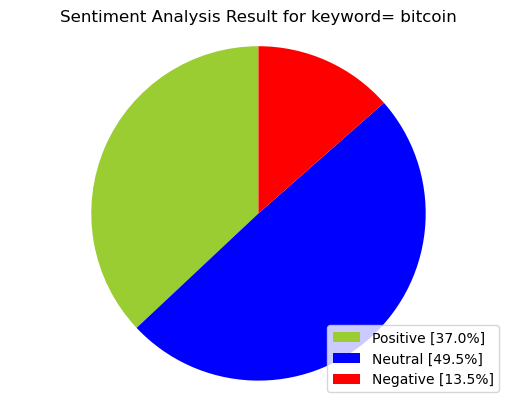

In [6]:
labels = ["Positive ["+str(positive)+"%]" , "Neutral ["+str(neutral)+"%]", "Negative ["+str(negative)+"%]"]
sizes = [positive, neutral, negative]
colors = ["yellowgreen", "blue", "red"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use("default")
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"")
plt.axis("equal")
plt.show()

In [7]:
tweet_list

,0
0,RT @igorlenterman: 🚨MAJOR WHITELIST LIVE🚨\n\nT...
1,RT @krakenfx: 🚀 It's not too late to get start...
2,"RT @rovercrc: If we break $25,000 the #Bitcoin..."
3,"RT @saylor: ""If we are living in a simulation,..."
4,RT @nayibbukele: Los que apostaron en contra d...
...,...
195,#Bitcoin : BTCGBP (BTCGBP) DOWN 2.4736%! Last ...
196,RT @gabrielleydon: The @limitbreak Bitcoin Nod...
197,RT @krakenfx: Only #bitcoin OGs will remember ...
198,🤔🤔#KISHU #KISHUARMY 🚀🚀🚀🌜🌜🤑🤑🤑🤑🤑🤑🤑🤫🤫 #ADA #Carda...


In [8]:
tweet_list.drop_duplicates(inplace = True)

In [9]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc

remove_rt = lambda x: re.sub(r'RT @\w+: ', " " , x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|(\w+:\/\/\S+)|([\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]+)|([^a-zA-Z0-9!?\.,'])", " ", x).encode("ascii", "ignore").decode()
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @igorlenterman: 🚨MAJOR WHITELIST LIVE🚨\n\nT...,major whitelist live the highly anticipate...
1,RT @krakenfx: 🚀 It's not too late to get start...,it's not too late to get started with bitc...
2,"RT @rovercrc: If we break $25,000 the #Bitcoin...","if we break 25,000 the bitcoin bull market ..."
3,"RT @saylor: ""If we are living in a simulation,...","if we are living in a simulation, bitcoin wi..."
4,RT @nayibbukele: Los que apostaron en contra d...,los que apostaron en contra de nuestro pa s p...
5,RT @rovercrc: #BITCOIN: IT'S HAPPENING NOW!!!\...,bitcoin it's happening now!!!
6,RT @saylor: @elerianm If you reside in #Turkey...,"if you reside in turkey, your best wealth ..."
7,https://t.co/eeO4rzecdE #bitcoin #BTC #crypto,bitcoin btc crypto
8,RT @gabrielleydon: The @limitbreak Bitcoin Nod...,the bitcoin node is ready to start inscribi...
9,RT @saylor: A fool and his #bitcoin are soon p...,a fool and his bitcoin are soon parted.


In [10]:
tw_list[["polarity", "subjectivity"]] = tw_list["text"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list["text"].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    if neg > pos:
        tw_list.loc[index, "sentiment"] = "negative"
    elif pos > neg:
        tw_list.loc[index, "sentiment"] = "positive"
    else:
        tw_list.loc[index, "sentiment"] = "neutral"
        tw_list.loc[index, "neg"] = neg
        tw_list.loc[index, "neu"] = neu
        tw_list.loc[index, "pos"] = pos
        tw_list.loc[index, "compound"] = comp
tw_list.head(25)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @igorlenterman: 🚨MAJOR WHITELIST LIVE🚨\n\nT...,major whitelist live the highly anticipate...,0.255295,0.568000,positive,NaN,NaN,NaN,NaN
1,RT @krakenfx: 🚀 It's not too late to get start...,it's not too late to get started with bitc...,-0.300000,0.600000,neutral,0.0,1.0,0.0,0.0
2,"RT @rovercrc: If we break $25,000 the #Bitcoin...","if we break 25,000 the bitcoin bull market ...",0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
3,"RT @saylor: ""If we are living in a simulation,...","if we are living in a simulation, bitcoin wi...",0.000000,0.000000,negative,NaN,NaN,NaN,NaN
4,RT @nayibbukele: Los que apostaron en contra d...,los que apostaron en contra de nuestro pa s p...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
5,RT @rovercrc: #BITCOIN: IT'S HAPPENING NOW!!!\...,bitcoin it's happening now!!!,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
6,RT @saylor: @elerianm If you reside in #Turkey...,"if you reside in turkey, your best wealth ...",1.000000,0.300000,positive,NaN,NaN,NaN,NaN
7,https://t.co/eeO4rzecdE #bitcoin #BTC #crypto,bitcoin btc crypto,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
8,RT @gabrielleydon: The @limitbreak Bitcoin Nod...,the bitcoin node is ready to start inscribi...,0.200000,0.500000,positive,NaN,NaN,NaN,NaN
9,RT @saylor: A fool and his #bitcoin are soon p...,a fool and his bitcoin are soon parted.,0.000000,0.000000,negative,NaN,NaN,NaN,NaN


In [11]:
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [12]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,73,43.20
positive,66,39.05
negative,30,17.75


Word Cloud Saved Successfull


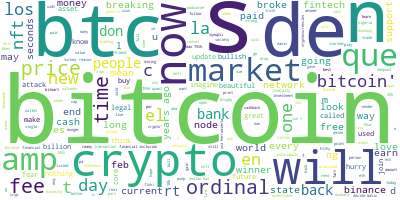

In [13]:
def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", max_words=3000, stopwords=stopwords, repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfull")
    path="wc.png"
    display(Image.open(path))

create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfull


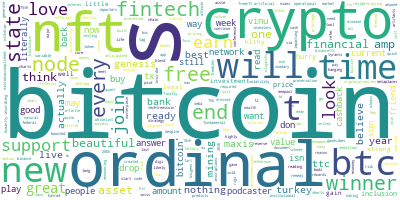

In [14]:
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfull


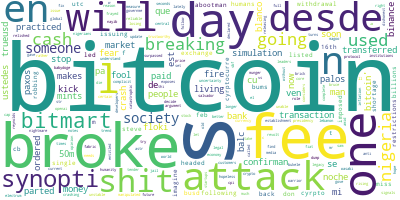

In [15]:
create_wordcloud(tw_list_negative["text"].values)

In [16]:
tw_list["text_len"] = tw_list["text"].astype(str).apply(len)
tw_list["text_word_count"] = tw_list["text"].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,103.03
neutral,78.81
positive,104.03


In [17]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,17.57
neutral,11.71
positive,16.82


In [18]:
#Removing Punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0–9]+', '', text)
    return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @igorlenterman: 🚨MAJOR WHITELIST LIVE🚨\n\nT...,major whitelist live the highly anticipate...,0.255295,0.568,positive,NaN,NaN,NaN,NaN,122,18,major whitelist live the highly anticipate...,"[, major, whitelist, live, the, highly, antici...","[, major, whitelist, live, highly, anticipated...","[, major, whitelist, live, highli, anticip, fi..."
1,RT @krakenfx: 🚀 It's not too late to get start...,it's not too late to get started with bitc...,-0.300000,0.600,neutral,0.0,1.0,0.0,0.0,50,9,its not too late to get started with bitcoin,"[, its, not, too, late, to, get, started, with...","[, late, get, started, bitcoin]","[, late, get, start, bitcoin]"
2,"RT @rovercrc: If we break $25,000 the #Bitcoin...","if we break 25,000 the bitcoin bull market ...",0.000000,0.000,neutral,0.0,1.0,0.0,0.0,56,10,if we break 25 the bitcoin bull market is b...,"[, if, we, break, 25, the, bitcoin, bull, mark...","[, break, 25, bitcoin, bull, market, back, ]","[, break, 25, bitcoin, bull, market, back, ]"
3,"RT @saylor: ""If we are living in a simulation,...","if we are living in a simulation, bitcoin wi...",0.000000,0.000,negative,NaN,NaN,NaN,NaN,75,13,if we are living in a simulation bitcoin wil...,"[, if, we, are, living, in, a, simulation, bit...","[, living, simulation, bitcoin, crash, bitcoin]","[, live, simul, bitcoin, crash, bitcoin]"
4,RT @nayibbukele: Los que apostaron en contra d...,los que apostaron en contra de nuestro pa s p...,0.000000,0.000,neutral,0.0,1.0,0.0,0.0,123,22,los que apostaron en contra de nuestro pa s p...,"[, los, que, apostaron, en, contra, de, nuestr...","[, los, que, apostaron, en, contra, de, nuestr...","[, lo, que, apostaron, en, contra, de, nuestro..."


In [19]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

169 Number of reviews has 902 words


C:\Users\0703L\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,abootman,absolut,acaba,accept,accumul,activ,actual,acut,ada,...,ximo,xrp,ya,yall,year,yesterday,yike,your,ytd,zero
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
bitcoin,119
btc,16
de,15
n,15
crypto,13
k,12
price,8
get,8
ordin,7
fee,7


In [21]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = "english").fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list["text"],(2,2),20)
n2_bigrams

[('years ago', 4),
 ('los que', 3),
 ('bitcoin btc', 3),
 ('btc bitcoin', 3),
 ('financial inclusion', 3),
 ('bitcoin ordinal', 2),
 ('000 bitcoin', 2),
 ('btc crypto', 2),
 ('bitcoin node', 2),
 ('bitcoin nfts', 2),
 ('bitcoin bitcoin', 2),
 ('bitcoin mining', 2),
 ('bitcoin crypto', 2),
 ('long way', 2),
 ('bitcoin mempool', 2),
 ('summary 60', 2),
 ('60 seconds', 2),
 ('seconds mean', 2),
 ('75th quant', 2),
 ('15 00', 2)]

In [22]:
n3_trigrams = get_top_n_gram(tw_list["text"],(3,3),20)
n3_trigrams

[('summary 60 seconds', 2),
 ('60 seconds mean', 2),
 ('100 rt paypay', 2),
 ('rt paypay bitcoin', 2),
 ('es una herramienta', 2),
 ('una herramienta incre', 2),
 ('herramienta incre ble', 2),
 ('onwinbonanza oyununda 150', 2),
 ('oyununda 150 freespin', 2),
 ('150 freespin le', 2),
 ('freespin le kazanman', 2),
 ('le kazanman keyfini', 2),
 ('kazanman keyfini kar', 2),
 ('keyfini kar bets10', 2),
 ('kar bets10 vbettr', 2),
 ('bitcoin paid fee', 2),
 ('good read fintech', 2),
 ('read fintech isn', 2),
 ('fintech isn current', 2),
 ('isn current state', 2)]